In [1]:
# %load science.py
%matplotlib notebook
from sympy import init_session, symbols
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import theano as T
import numba as nb
#from sympy.geometry import *
init_session()
a,b,c = symbols('a b c', positive=True)
r, theta, phi = symbols('r theta phi', positive=True)
print('Loaded a b c theta and phi')
print('Load Theano as T')

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/
Loaded a b c theta and phi
Load Theano as T


## 12.1: Folding

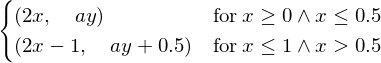

In [2]:
X_nplus1 = Piecewise(((2*x,a*y),And((x<=1/2),(x>=0))),((2*x-1,a*y+1/2),And((1/2<x),x<=1)))
X_nplus1

In [3]:
X_nplus1.subs({x:1,a:1/3})

## 12.2: Henon Map

<IPython.core.display.Javascript object>


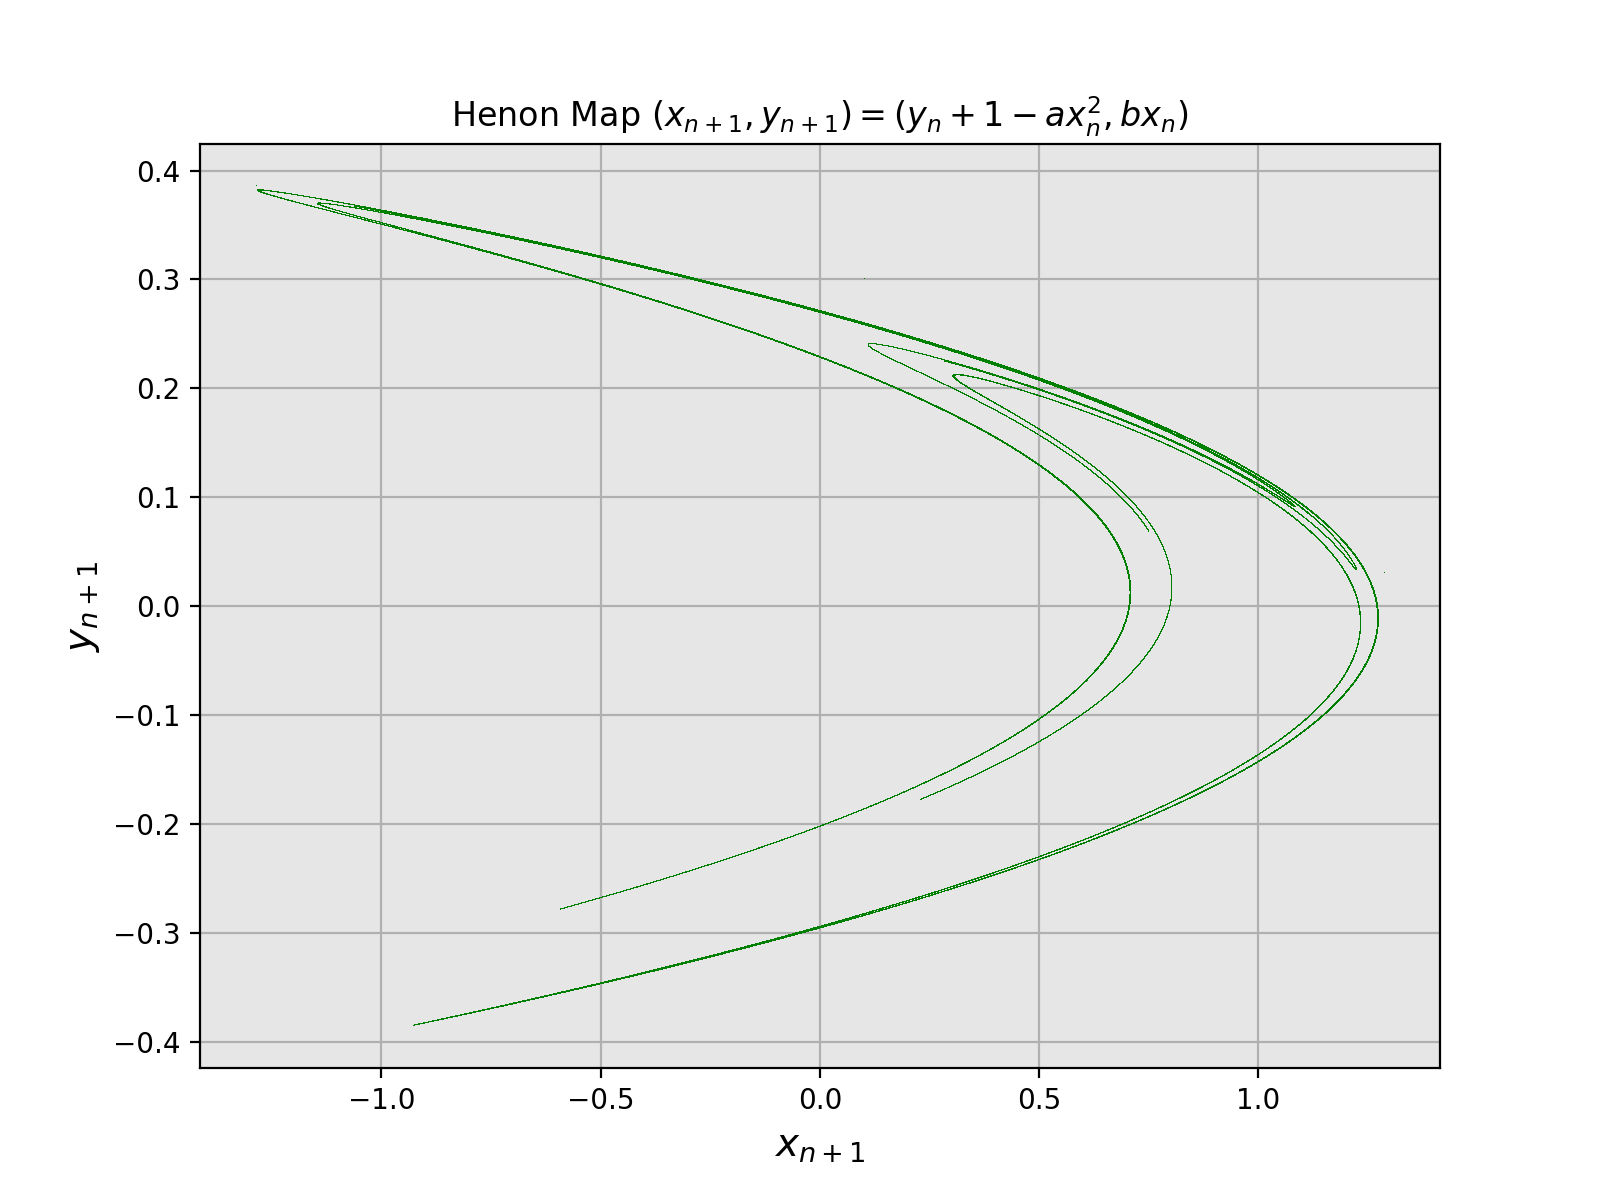

In [4]:

#numba gives a speedup of 3x for iterates 10^7...
#http://www.ams.org/samplings/feature-column/fcarc-henon
@nb.jit(nopython=True)
def HenonMap(a,b,x,y):
    return y + 1.0 - a *x*x, b * x

# Map dependent parameters
a1 =1.4
b1 = 0.3
iterates = 1e6

# Initial Condition
xtemp = 0.1
ytemp = 0.3

@nb.jit(nopython=True)
def make_points(xtemp=xtemp, ytemp=ytemp, iterates=iterates):
    x = [xtemp]
    y = [ytemp]
    for n in range(0,iterates):
        xtemp, ytemp = HenonMap(a1,b1,xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
    return np.array(x),np.array(y)
X,Y = make_points()
# Plot the time series
fig, (ax0_0)= plt.subplots(1,1,figsize=(8,6))
ax0_0.set_title(r'Henon Map $(x_{n + 1},y_{n + 1}) = (y_n + 1 - ax_n^2,b x_n)$')
ax0_0.set_facecolor(plt.cm.gray(.9))
ax0_0.set_xlabel(r'$x_{n+1}$',size=14)
ax0_0.set_ylabel(r'$y_{n+1}$',size=14)
ax0_0.plot(X,Y, 'g,')
ax0_0.grid()
#Subset of points
# X_1 = X[np.where(((X > -1.3)&(X<-1.1)))]
# Y_1 = Y[np.where(((X > .34)&(X<.39)))]
# ax0_1.set_facecolor(plt.cm.gray(.9))
# ax0_1.set_xlabel(r'$x_{n+1}$',size=14)
# ax0_1.set_ylabel(r'$y_{n+1}$',size=14)
# ax0_1.plot(X_1,Y_1, 'g.', markersize=.5)
# ax0_1.grid()


In [5]:
X_array = np.array((X,Y)).T

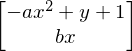

In [6]:
H = Matrix([1-a*x**2+y,b*x])
H

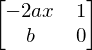

In [7]:
X_n = Matrix([x,y])
J_H = H.jacobian(X_n)
J_H

In [8]:
J_H.det()

In [9]:
#Is this less than 1, and thus area-contracting? 
#Note, one needs to specify that b is positive at declaration. 
J_H.det() < 1

## Rossler System

## Exercises

### Exercise 12.1.8

Area preserving map $$x_{n + 1} = x_n cos \alpha - (y_n - x^2_n) sin \alpha$$

$$y_{n + 1} = y_n sin \alpha + (y_n - x^2_n) cos \alpha$$

<IPython.core.display.Javascript object>


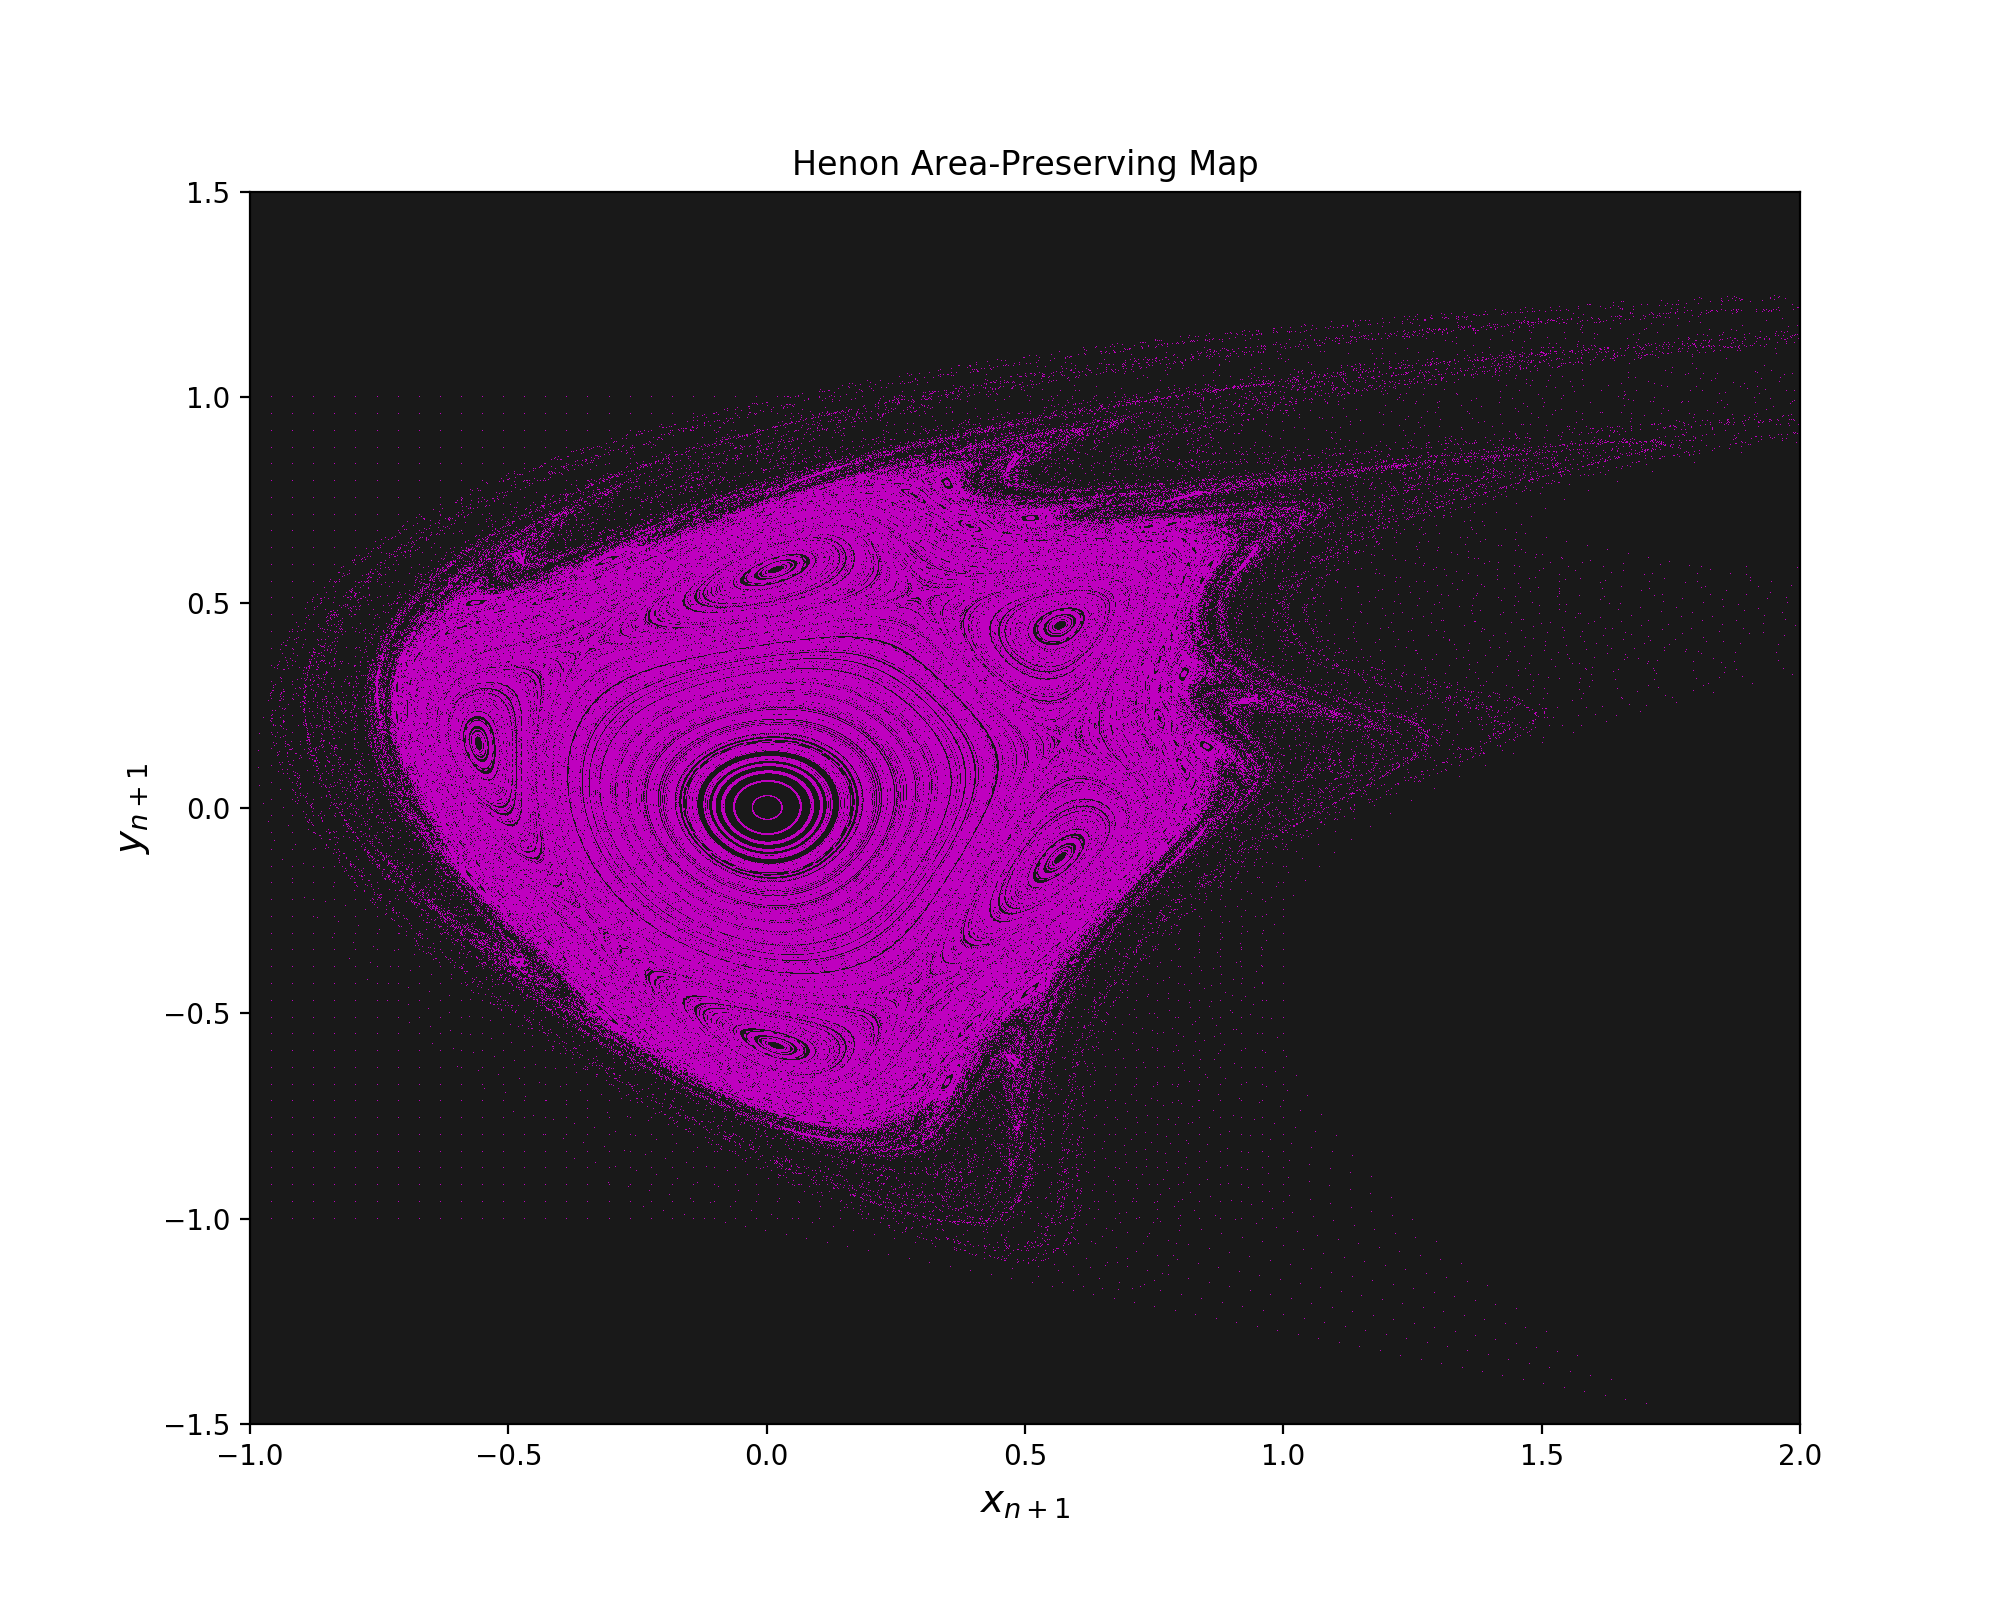

In [66]:
@nb.jit(nopython=True)
def HenonMap2(a,x,y):
    return x*np.cos(a)-(y-x*x)*np.sin(a), x*np.sin(a)+(y-x*x)*np.cos(a)

# Map dependent parameters
a1 = np.arccos(.24)
iterates = 1e3
xtemp = .1
ytemp = .1
@nb.jit(nopython=True)
def make_points(xtemp=xtemp, ytemp=ytemp, a1=a1, iterates=iterates):
    x = [xtemp]
    y = [ytemp]
    for n in range(0,iterates):
        xtemp, ytemp = HenonMap2(a1,xtemp,ytemp)
#         x.append( np.mod(xtemp,np.pi) )
#         y.append( np.mod(ytemp,np.pi) )
        x.append(xtemp)
        y.append(ytemp)
    return np.array(x),np.array(y)
#########################################
domain = np.linspace(-1,1,50)
X_next = [] 
Y_next = []
for xt in domain:
    for yt in domain:
        X_, Y_ = make_points(xt,yt)
        X_next.append(X_)
        Y_next.append(Y_)
X_next = np.array(X_next) #This is a gotcha... works only with array, not list...
Y_next = np.array(Y_next)
#########################################
# Plot the time series
N = 20
colors = np.random.rand(N)
fig, ax1= plt.subplots(1,1,figsize=(10,8))
ax1.set_title(r'Henon Area-Preserving Map')
ax1.set_facecolor(plt.cm.gray(.1))
ax1.set_xlabel(r'$x_{n+1}$',size=14)
ax1.set_ylabel(r'$y_{n+1}$',size=14)
ax1.plot(X_next,Y_next,'m,')
ax1.set_xlim(-1.,2.)
ax1.set_ylim(-1.5,1.5)

<IPython.core.display.Javascript object>


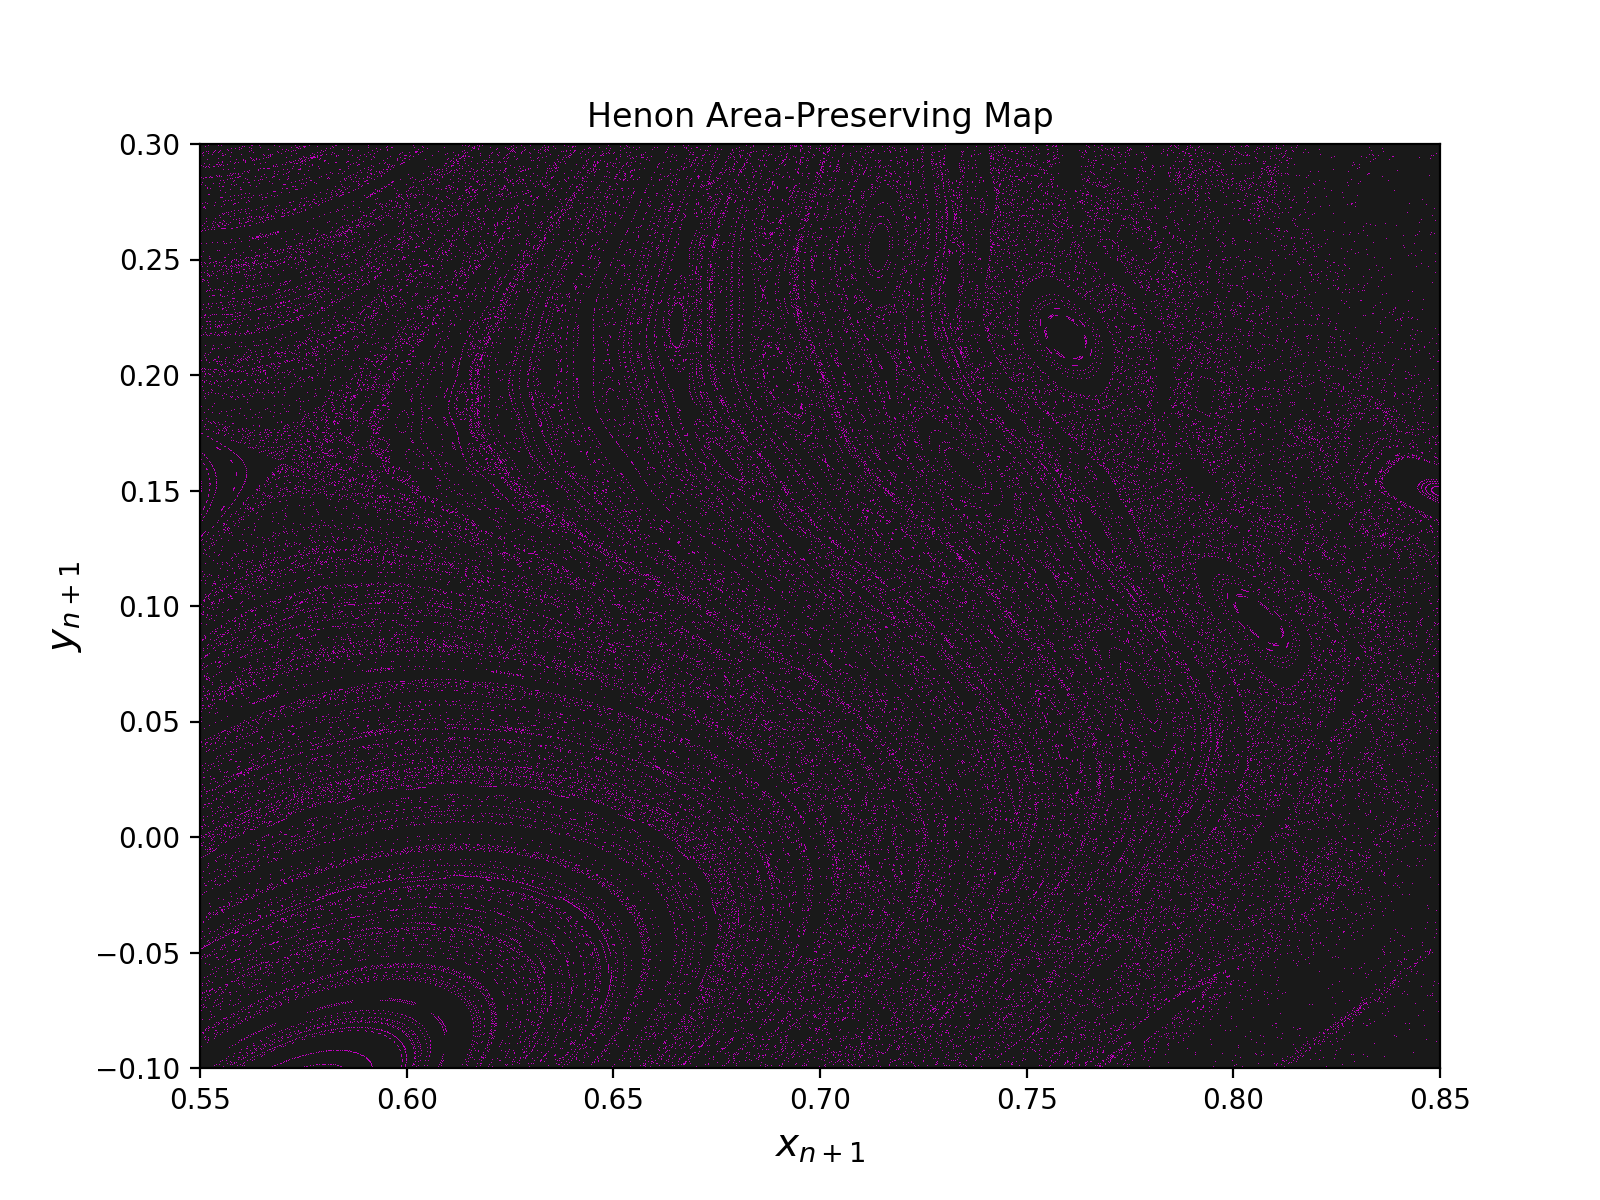

In [67]:
fig, ax1_1= plt.subplots(1,1,figsize=(8,6))
ax1_1.set_title(r'Henon Area-Preserving Map')
ax1_1.set_facecolor(plt.cm.gray(.1))
ax1_1.set_xlabel(r'$x_{n+1}$',size=14)
ax1_1.set_ylabel(r'$y_{n+1}$',size=14)
ax1_1.plot(X_next,Y_next,'m,')
ax1_1.set_xlim(.55,.85)
ax1_1.set_ylim(-.1,.3)
#ax1.figure.savefig('Henon_area_preserving_map.png')

<IPython.core.display.Javascript object>


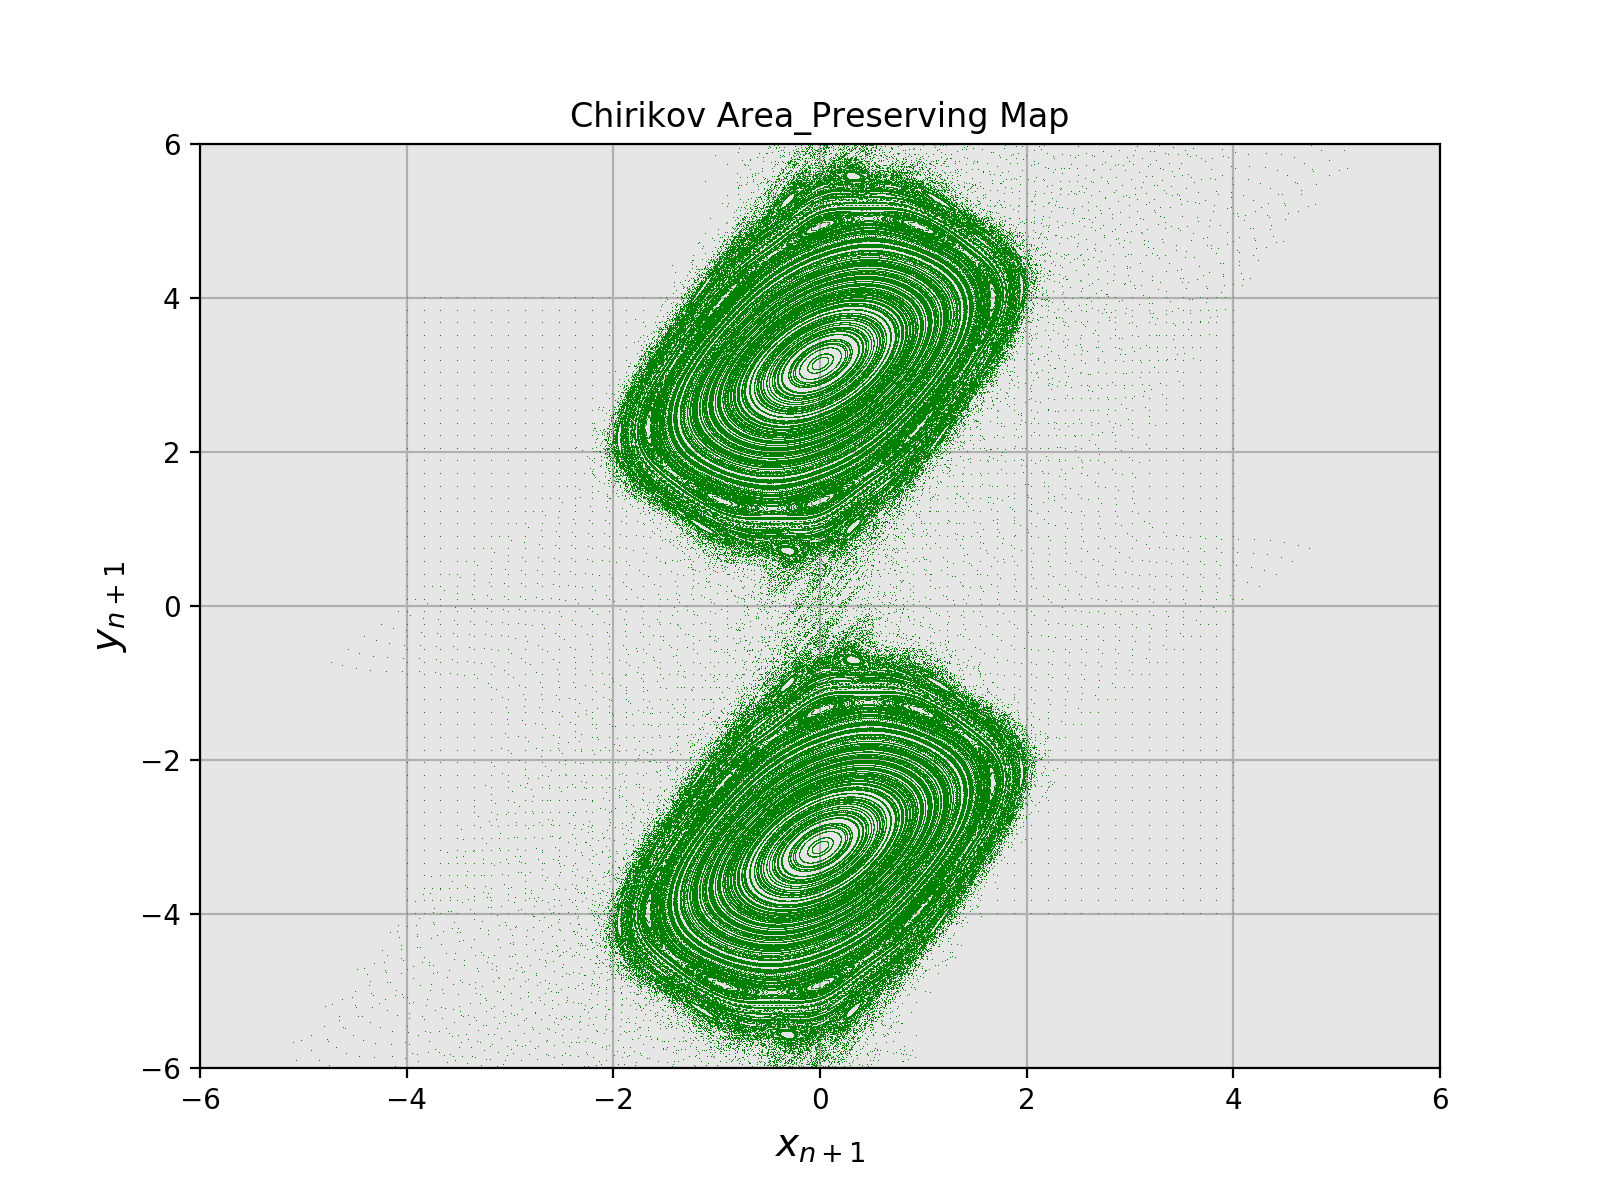

In [18]:
#https://en.wikipedia.org/wiki/Standard_map
@nb.jit(nopython=True)
def HenonMap3(a,x,y):
    return x + a*np.sin(y), y + x + a*np.sin(y)

# Map dependent parameters
a1 = .971635
iterates = 1e3

@nb.jit(nopython=True)
def make_points(xtemp=xtemp, ytemp=ytemp, a1=a1, iterates=iterates):
    x = [xtemp]
    y = [ytemp]
    for n in range(0,iterates):
        xtemp, ytemp = HenonMap3(a1,xtemp,ytemp)
        x.append(xtemp)
        y.append(ytemp)
    return np.array(x),np.array(y)
#########################################
domain = np.linspace(-4,4,50)
X_next2 = [] 
Y_next2 = []
for xt in domain:
    for yt in domain:
        X_, Y_ = make_points(xt,yt)
        X_next2.append(X_)
        Y_next2.append(Y_)
X_next2 = np.array(X_next2)
Y_next2 = np.array(Y_next2)
#########################################
fig, (ax2)= plt.subplots(1,1,figsize=(8,6))
ax2.set_title(r'Chirikov Area_Preserving Map')
ax2.set_facecolor(plt.cm.gray(.9))
ax2.set_xlabel(r'$x_{n+1}$',size=14)
ax2.set_ylabel(r'$y_{n+1}$',size=14)
ax2.plot(X_next2,Y_next2, 'g,')
ax2.set_xlim(-6,6)
ax2.set_ylim(-6,6)

<IPython.core.display.Javascript object>


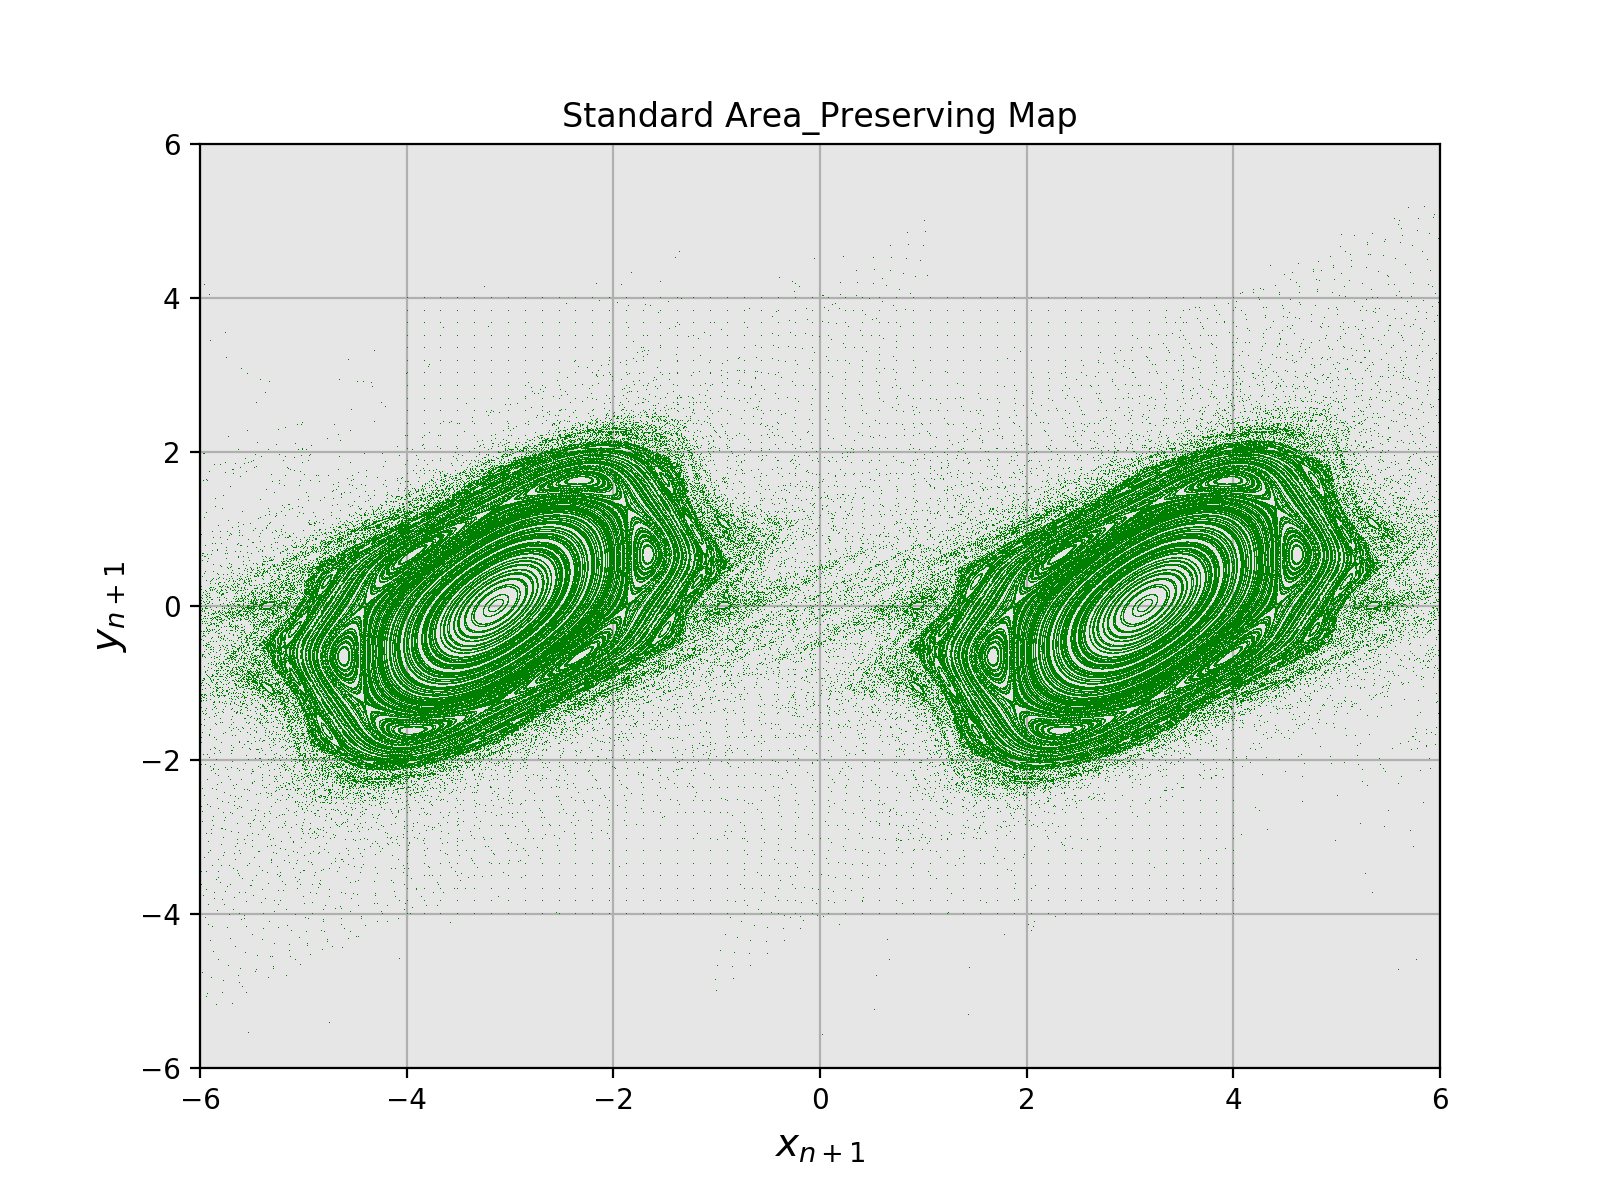

In [65]:
#https://en.wikipedia.org/wiki/Standard_map
@nb.jit(nopython=True)
def StandardMap(K,x,y):
    return x + y + K*np.sin(x), y+ K*np.sin(x)

# Map dependent parameters
K = 1
iterates = 1e3

@nb.jit(nopython=True)
def make_points(xtemp=xtemp, ytemp=ytemp, a1=a1, iterates=iterates):
    x = [xtemp]
    y = [ytemp]
    for n in range(0,iterates):
        xtemp, ytemp = StandardMap(a1,xtemp,ytemp)
        x.append(xtemp)
        y.append(ytemp)
    return np.array(x),np.array(y)
#########################################
domain = np.linspace(-4,4,50)
X_next3 = [] 
Y_next3 = []
for xt in domain:
    for yt in domain:
        X_, Y_ = make_points(xt,yt)
        X_next3.append(X_)
        Y_next3.append(Y_)
X_next3 = np.array(X_next3)
Y_next3 = np.array(Y_next3)
#########################################
fig, (ax3)= plt.subplots(1,1,figsize=(8,6))
ax3.set_title(r'Standard Area_Preserving Map')
ax3.set_facecolor(plt.cm.gray(.9))
ax3.set_xlabel(r'$x_{n+1}$',size=14)
ax3.set_ylabel(r'$y_{n+1}$',size=14)
ax3.plot(X_next3,Y_next3, 'g,')
ax3.set_xlim(-6,6)
ax3.set_ylim(-6,6)
ax3.grid()

<IPython.core.display.Javascript object>


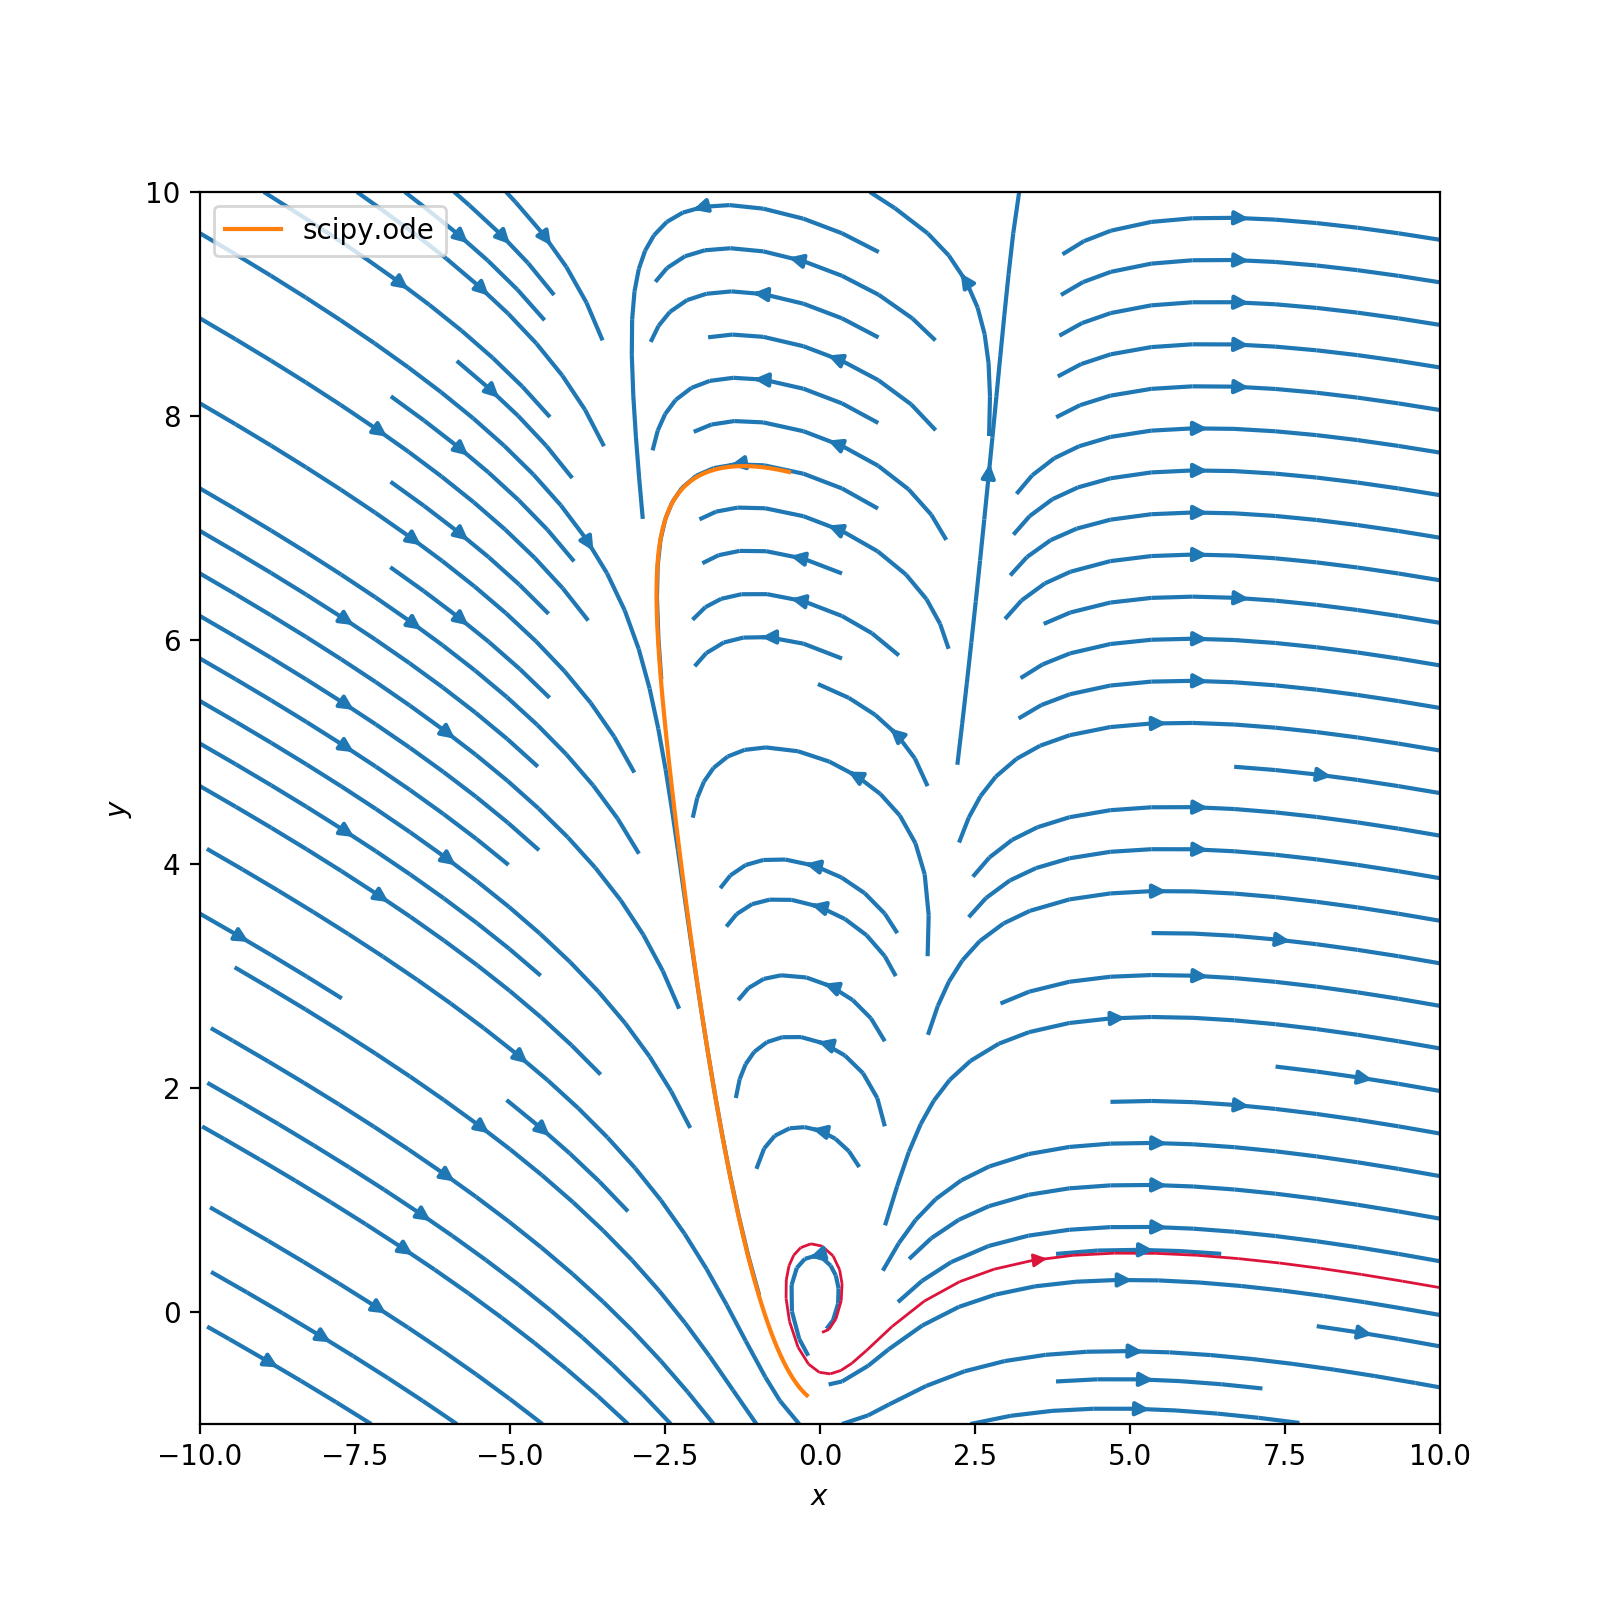

In [12]:
#Plotting invariant manifolds
#https://mathematica.stackexchange.com/questions/113003/plotting-invariant-manifolds-of-the-henon-map
from scipy import *
from scipy import integrate
from scipy.integrate import ode, odeint
fig,ax3 = plt.subplots(1,1,figsize=(8,8))
## Vector field function
def vf1(x,t,a):
  dx=np.zeros(2)
  dx[0]=x[0]*np.cos(a)-(x[1]-x[0]*x[0])*np.sin(a)
  dx[1]=x[0]*np.sin(a)+(x[1]-x[0]*x[0])*np.cos(a)
  return dx
#Integrate under curve
# Initial condition
xx0 = np.array([-.5,7.5])
a = np.arccos(.2)
# Solve
t = np.linspace(0, 5, 1000)
ys = odeint(vf1, xx0, t, args=(a,))

#Vector field
x1,y1 = np.linspace(-10,10,1000),np.linspace(-1,10,1000)
X,Y = np.meshgrid(x1,y1 )
U = X*np.cos(a)-(Y-X*X)*np.sin(a)
V = X*np.sin(a)+(Y-X*X)*np.cos(a)

# #Normalize arrows
# N = np.sqrt(U**2+V**2)
# U2, V2 = U/N, V/N

start = [[.2,.5]]

strm = ax3.streamplot( X,Y,U, V)
strmS = ax3.streamplot(x1,y1, U, V, start_points=start, color="crimson", linewidth=1)
ax3.plot(ys[:,0],ys[:,1],label='scipy.ode')
#plt.xlim([0,5])
#plt.ylim([-2,2])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()